In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [61]:
fl = pd.read_csv('/content/data.csv')

In [62]:
fl

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0000,-0.0436,0.0409,0.0000,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NonToxic
1,0.0213,0,0.1144,-0.0410,0,0.0000,0.1231,-0.0316,0.0000,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NonToxic
2,0.0018,0,-0.0156,-0.0765,2,0.0000,-0.1138,-0.1791,0.0000,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NonToxic
3,-0.0251,0,-0.0064,-0.0894,3,0.0000,-0.0747,-0.1151,0.0000,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NonToxic
4,0.0135,0,0.0424,-0.0353,0,0.0000,-0.0638,0.0307,0.0000,0.0306,...,12.3240,19.7486,0.1789,1.4495,0.0120,2,0.0,-0.1071,0.00,NonToxic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.0960,0,-0.0478,-0.0840,2,0.0000,-0.0739,-0.2315,1.5660,-0.1133,...,2.5690,12.0174,0.1648,0.9710,0.0049,1,0.0,-0.0952,0.00,NonToxic
167,-0.0064,1,-0.1222,0.0013,1,0.0000,-0.1873,-0.2181,5.5404,-0.0757,...,10.7860,6.4871,0.1805,1.2298,0.0127,1,0.0,-0.0860,0.00,NonToxic
168,0.0096,2,-0.1846,0.0058,1,0.0000,-0.1293,-0.0979,5.3976,0.0409,...,4.9930,19.2864,0.2089,1.1245,0.0093,1,0.0,-0.0927,0.00,NonToxic
169,-0.0736,2,-0.1267,-0.0345,2,0.5346,-0.0361,0.0151,5.5190,-0.1025,...,10.7504,19.4989,0.1944,1.2256,0.0167,1,0.0,-0.1129,0.00,Toxic


In [63]:
fl.loc[fl['Class'] == 'Toxic', 'Class'] = 1
fl.loc[fl['Class'] != 1, 'Class'] = 0
fl['Class'] = fl['Class'].astype(int)
fl = fl.sort_values(by='Class', ascending=False)

In [64]:
fl

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
85,-0.0367,0,-0.1017,-0.0453,1,0.0000,-0.1597,-0.4729,0.5839,-0.0634,...,5.1969,19.6524,0.1905,1.3400,0.0134,0,0.0,-0.0686,0.0,1
100,-0.0616,0,0.0227,-0.0883,2,0.0000,-0.0079,0.0350,5.0270,-0.0139,...,5.1649,6.2288,0.2116,1.1487,0.0073,2,0.0,-0.0446,0.0,1
111,-0.0547,0,-0.0022,-0.0806,0,0.0000,0.0269,0.1063,0.0000,0.0092,...,5.2089,10.4910,0.2112,1.1602,0.0088,0,0.0,-0.0504,0.0,1
110,-0.0811,0,-0.0407,-0.1109,2,0.0000,-0.0481,-0.0257,5.0634,-0.0541,...,7.8276,13.4239,0.1998,1.3383,0.0122,2,0.0,-0.0972,0.0,1
109,-0.0658,1,0.0056,-0.1057,1,0.0000,-0.0367,0.0461,0.7553,-0.0127,...,5.1992,20.0090,0.2083,1.1745,0.0138,1,0.0,-0.0955,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51,-0.0921,0,0.0665,-0.1504,0,0.0000,-0.0130,0.0242,0.0000,-0.0669,...,7.6021,9.9088,0.2116,1.1604,0.0139,1,0.0,-0.0806,0.0,0
52,0.0934,0,0.1826,0.0578,0,0.0000,0.2267,0.1455,0.0000,0.1663,...,0.0000,21.0268,0.2334,1.0597,0.0014,4,0.0,-0.0422,0.0,0
53,-0.0348,2,-0.0384,-0.0447,2,4.0551,-0.0322,0.0420,0.0000,-0.0287,...,11.3438,13.2585,0.2333,1.1342,0.0072,4,0.0,-0.0761,0.5,0
54,-0.0607,1,-0.0084,-0.0799,1,0.0000,-0.0621,0.0433,0.7786,-0.0427,...,5.1995,20.0163,0.2042,1.1736,0.0122,1,0.0,-0.0992,0.0,0


In [65]:
scaler = StandardScaler()
X = fl.drop(columns='Class')
standardized_X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
fl = pd.concat([standardized_X, fl['Class']], axis=1)

In [66]:
fl

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,-0.086096,-0.415139,-1.579831,0.222910,0.005290,-0.412646,-1.712472,-3.844625,-0.395716,-0.902062,...,-0.663929,0.992153,-0.495344,0.767857,0.381285,-1.452737,-0.108691,0.564910,-0.255827,0
1,-0.479010,-0.415139,0.371829,-0.368743,0.909836,-0.412646,0.223397,0.808934,1.388626,-0.231870,...,-0.671162,-1.169162,0.373519,-0.632346,-0.734648,0.526690,-0.108691,1.387180,-0.255827,0
2,-0.370130,-0.415139,-0.018817,-0.262796,-0.899257,-0.412646,0.667193,1.462210,-0.630209,0.080887,...,-0.661216,-0.482912,0.357048,-0.548172,-0.460238,-1.452737,-0.108691,1.188465,-0.255827,0
3,-0.786713,-0.415139,-0.622827,-0.679704,0.909836,-0.412646,-0.289264,0.252779,1.403245,-0.776147,...,-0.069264,-0.010689,-0.112386,0.755414,0.161757,0.526690,-0.108691,-0.414962,-0.255827,0
4,-0.545284,0.899468,0.103554,-0.608155,0.005290,-0.412646,-0.143882,0.910636,-0.326882,-0.215622,...,-0.663409,1.049568,0.237631,-0.443505,0.454461,-0.463024,-0.108691,-0.356718,-0.255827,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.960290,-0.415139,1.058988,-1.223198,-0.899257,-0.412646,0.158358,0.709981,-0.630209,-0.949450,...,-0.120238,-0.576651,0.373519,-0.546709,0.472755,-0.463024,-0.108691,0.153775,-0.255827,0
167,1.966839,-0.415139,2.880432,1.641499,-0.899257,-0.412646,3.215195,1.821374,-0.630209,2.207903,...,-1.838678,1.213443,1.271208,-1.283773,-1.813994,2.506116,-0.108691,1.469407,-0.255827,0
168,-0.056115,2.214075,-0.586744,0.231165,0.909836,2.056216,-0.086495,0.873070,-0.630209,-0.432250,...,0.725566,-0.037320,1.267090,-0.738477,-0.752942,2.506116,-0.108691,0.307951,1.817244,0
169,-0.464808,0.899468,-0.116086,-0.253164,0.005290,-0.412646,-0.467803,0.884981,-0.317524,-0.621800,...,-0.663341,1.050744,0.068799,-0.450092,0.161757,-0.463024,-0.108691,-0.483484,-0.255827,1


In [67]:
fl.describe()

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
count,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,171.000000,1.710000e+02,1.710000e+02,171.000000,...,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,1.710000e+02,171.000000
mean,-1.038805e-17,-5.713428e-17,4.414922e-17,2.597013e-17,5.194026e-17,-4.674623e-17,0.000000,2.077610e-17,-3.895519e-17,0.000000,...,2.311342e-16,2.856714e-16,2.077610e-16,4.778504e-16,-1.558208e-16,9.089545e-18,1.168656e-17,1.090745e-16,-5.194026e-18,0.327485
std,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937,1.002937e+00,1.002937e+00,1.002937,...,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,1.002937e+00,0.470674
min,-4.422349e+00,-4.151390e-01,-2.880414e+00,-3.948926e+00,-8.992569e-01,-4.126456e-01,-2.378166,-3.844625e+00,-9.148218e-01,-2.733922,...,-1.838678e+00,-2.172053e+00,-1.603043e+00,-3.100450e+00,-1.813994e+00,-1.452737e+00,-1.086910e-01,-4.029523e+00,-2.558266e-01,0.000000
25%,-5.594862e-01,-4.151390e-01,-5.490911e-01,-5.235353e-01,-8.992569e-01,-4.126456e-01,-0.524552,-5.933641e-01,-6.302090e-01,-0.752454,...,-6.712075e-01,-7.519650e-01,-8.268304e-01,-6.246602e-01,-6.889133e-01,-4.630238e-01,-1.086910e-01,-4.937627e-01,-2.558266e-01,0.000000
50%,-1.982148e-02,-4.151390e-01,-1.567940e-02,2.890268e-02,5.289747e-03,-4.126456e-01,-0.150259,9.976784e-02,-6.302090e-01,-0.065337,...,-6.460757e-02,-2.376336e-02,-1.206213e-01,2.713318e-02,-1.126525e-01,-4.630238e-01,-1.086910e-01,9.210465e-02,-2.558266e-01,0.000000
75%,5.695492e-01,-4.151390e-01,4.706666e-01,6.109232e-01,9.098364e-01,-4.126456e-01,0.357939,6.192732e-01,1.336599e+00,0.721970,...,5.764081e-01,9.385448e-01,7.070639e-01,6.606281e-01,4.727553e-01,5.266895e-01,-1.086910e-01,6.419977e-01,-2.558266e-01,1.000000
max,2.719529e+00,4.843289e+00,3.437377e+00,2.621164e+00,4.528023e+00,4.544073e+00,3.505958,2.432503e+00,2.478484e+00,2.236335,...,2.864342e+00,2.316803e+00,2.864811e+00,2.296150e+00,4.259612e+00,3.495829e+00,9.570006e+00,2.665124e+00,1.067382e+01,1.000000


In [68]:
fl['Class'].value_counts()

Class
0    115
1     56
Name: count, dtype: int64

In [69]:
U, S, VT = np.linalg.svd(fl, full_matrices=0)

Total points plotted: 171


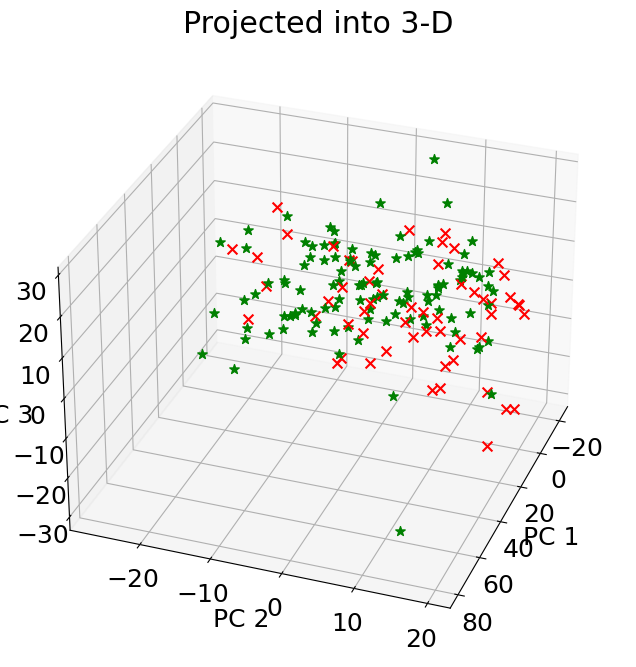

In [70]:
fig2 = plt.figure(figsize=(10, 8))
ax = fig2.add_subplot(111, projection='3d')

count = 0
for i, row in fl.iterrows():
    x = VT[0, :] @ row.values.T
    y = VT[1, :] @ row.values.T
    z = VT[2, :] @ row.values.T
    if row['Class'] == 1:
        ax.scatter(x, y, z, marker='x', color='r', s=50)
    else:
        ax.scatter(x, y, z, marker='*', color='g', s=50)
    count += 1
ax.view_init(30, 20)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')

print(f"Total points plotted: {count}")
plt.title("Projected into 3-D")
plt.show()

In [71]:
from mpl_toolkits.mplot3d import Axes3D

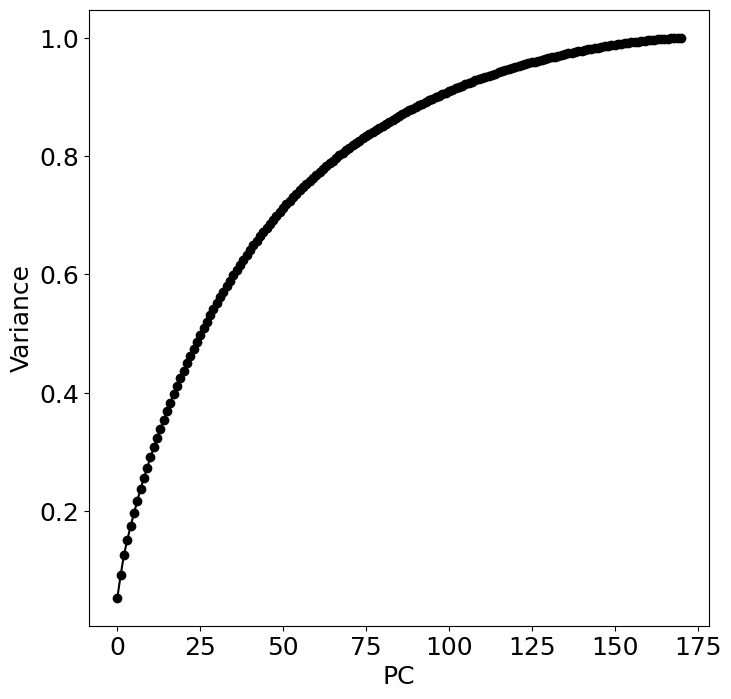

In [72]:
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams.update({'font.size':18})
plt.plot(np.cumsum(S)/np.sum(S), '-o', color='k')
plt.xlabel('PC')
plt.ylabel('Variance')
plt.show()

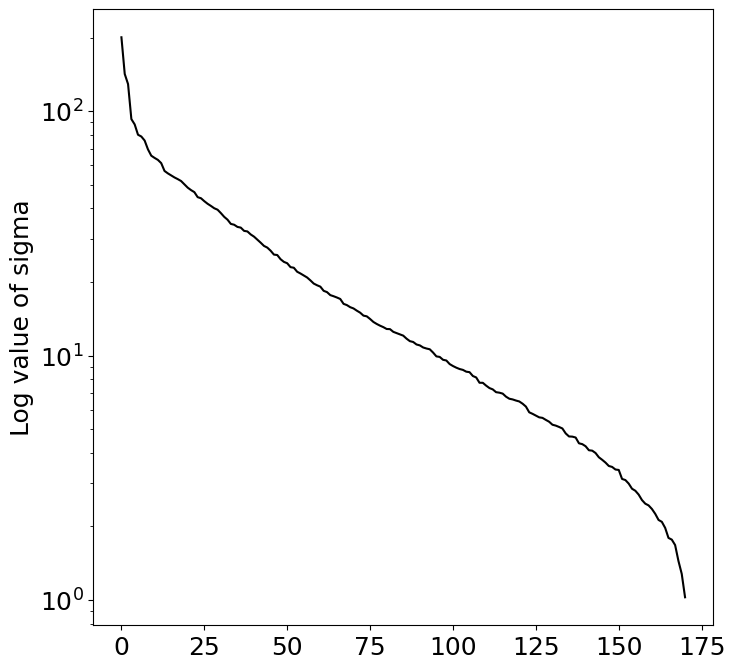

In [73]:
plt.semilogy(S, color='k')
plt.ylabel('Log value of sigma')
plt.show()

In [74]:
indx = np.where(np.cumsum(S)/np.sum(S)>= 0.9)[0][0]
print(f'90% of the variance is explained by {indx} Principle Components/singular vector')

90% of the variance is explained by 97 Principle Components/singular vector


In [75]:
pc = 97
X_app = U[:, :pc] @ np.diag(S[:pc]) @ VT[:pc,:]

In [76]:
approx_error = np.linalg.norm(fl - X_app) / np.linalg.norm(fl)

In [77]:
print(f'Relative approximation error: {approx_error}')

Relative approximation error: 0.10597493919010312


In [78]:
V_pc = VT[:pc, :]

In [79]:
feature_imp = np.abs(V_pc).sum(axis=0)

In [80]:
sorted_ind = np.argsort(feature_imp)[::-1]

In [81]:
features = [fl.columns[i] for i in sorted_ind[:40]]

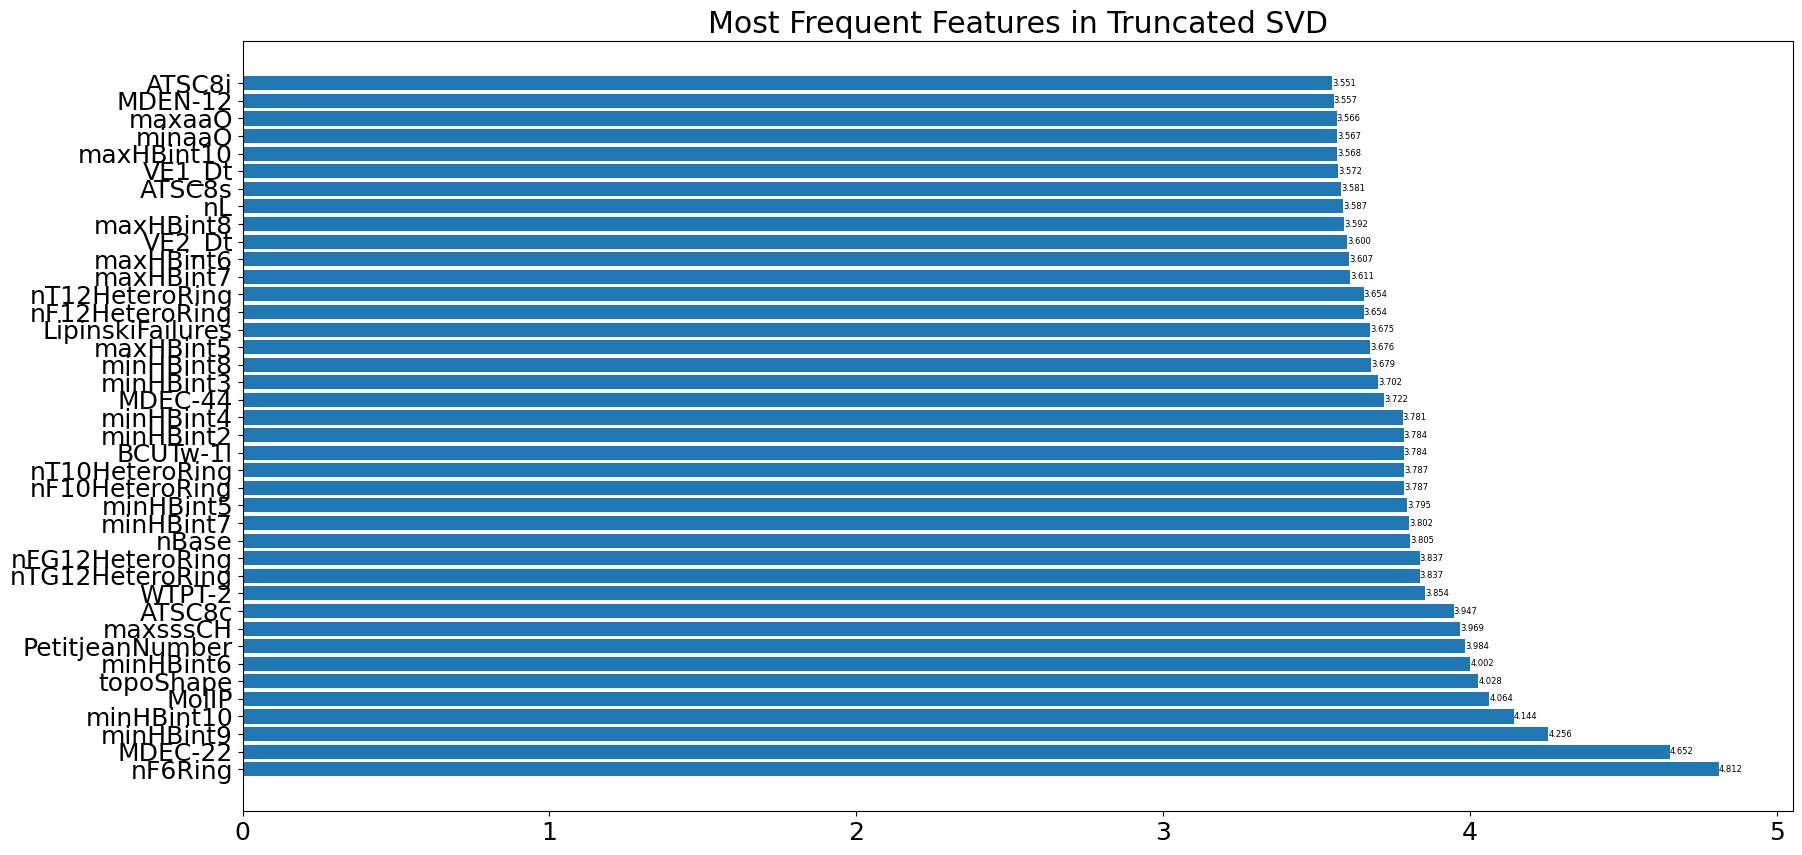

In [82]:
plt.figure(figsize=(20, 10))
bars = plt.barh(range(40), feature_imp[sorted_ind[:40]])
for bar, value in zip(bars, feature_imp[sorted_ind[:40]]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.3f}',
             va='center', ha='left', fontsize=6)

plt.yticks(range(40), features)
plt.title('Most Frequent Features in Truncated SVD')
plt.show()

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [84]:
col = [fl.columns[i] for i in sorted_ind[:100]] + ['Class'] #100

In [85]:
selected_feature_fl = fl[col]

In [86]:
selected_feature_fl

,nF6Ring,MDEC-22,minHBint9,minHBint10,MolIP,topoShape,minHBint6,PetitjeanNumber,maxsssCH,ATSC8c,...,SsssCH,nHAvin,GATS7p,nHBint5,SHBint5,VE1_D,nHBint7,n7Ring,nT7Ring,Class
0,-0.097186,0.231498,-0.352391,-0.301058,0.10261,0.908997,0.002159,0.891137,-0.23186,1.988065,...,0.384444,-0.462042,-1.078383,-0.469262,-0.359037,-0.908812,-0.465466,-0.212132,-0.212132,0
1,-0.097186,0.824573,-0.352391,-0.301058,0.10261,0.908997,0.518545,0.891137,-0.23186,-0.072751,...,0.384444,-0.462042,-0.948786,-0.469262,-0.359037,-1.066019,-0.465466,-0.212132,-0.212132,0
2,-0.097186,-1.737138,-0.352391,-0.301058,0.10261,-0.455565,-0.414969,-0.415705,-0.23186,-1.053592,...,0.384444,1.617148,-0.696504,-0.469262,-0.359037,1.008802,-0.465466,-0.212132,-0.212132,0
3,-0.097186,0.734816,0.334670,-0.301058,0.10261,0.908997,-0.184560,0.891137,-0.23186,-0.992008,...,-1.599390,-0.462042,-0.301665,1.030622,0.590928,2.035317,0.418919,-0.212132,-0.212132,0
4,-0.097186,-0.109687,-0.352391,0.883486,0.10261,0.908997,-0.414969,0.891137,-0.23186,0.170080,...,0.384444,-0.462042,-2.113430,0.280680,1.230275,0.397874,1.303305,-0.212132,-0.212132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.097186,0.557875,-0.352391,-0.301058,0.10261,-0.592172,-0.414969,-0.552979,-0.23186,-0.672571,...,0.384444,-0.462042,-0.984209,-0.469262,-0.359037,-0.715027,-0.465466,-0.212132,-0.212132,0
167,-0.097186,1.562315,-0.352391,-0.301058,0.10261,-0.758801,-0.414969,-0.723198,-0.23186,0.506540,...,0.384444,-0.462042,-0.142693,-0.469262,-0.359037,-1.066019,-0.465466,7.848885,7.848885,0
168,-0.097186,1.581914,-0.352391,0.183877,0.10261,0.908997,0.045211,0.891137,-0.23186,1.328664,...,-0.145006,-0.462042,-0.577275,-0.469262,-0.359037,0.773769,-0.465466,-0.212132,-0.212132,0
169,-0.097186,0.203015,-0.352391,0.734336,0.10261,0.908997,-0.414969,0.891137,-0.23186,-0.160872,...,0.384444,-0.462042,-1.077519,-0.469262,-0.359037,0.535624,1.303305,-0.212132,-0.212132,1


In [87]:

X = selected_feature_fl.drop(columns='Class')
y = selected_feature_fl['Class']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [89]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [90]:
y_pred = model.predict(X_test)

In [91]:
acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [92]:
print(class_report)

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.29      0.67      0.40         3

    accuracy                           0.67        18
   macro avg       0.60      0.67      0.58        18
weighted avg       0.81      0.67      0.71        18



# Second Iteration

In [93]:
fl = fl.sort_values(by='Class', ascending=False)

In [94]:
U1, S1, VT1 = np.linalg.svd(selected_feature_fl, full_matrices=0)

Total points plotted: 171


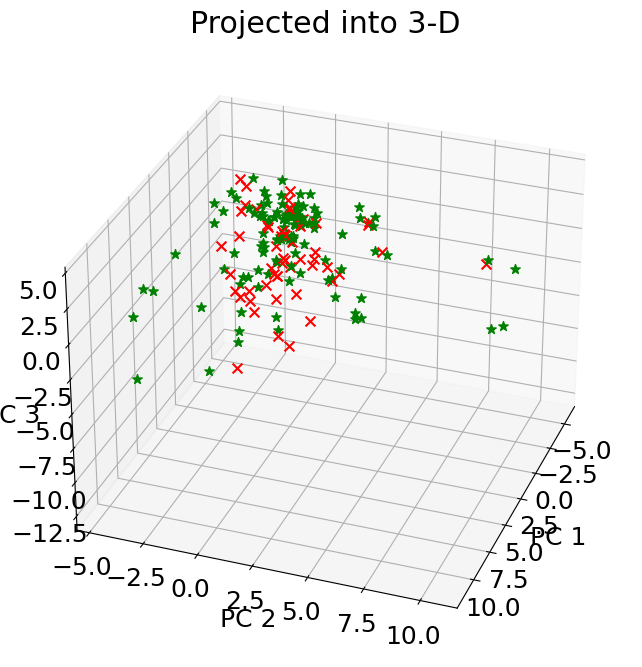

In [95]:
fig2 = plt.figure(figsize=(10, 8))
ax = fig2.add_subplot(111, projection='3d')
count = 0
for i, row in selected_feature_fl.iterrows():
    x = VT1[0, :] @ row.values.T
    y = VT1[1, :] @ row.values.T
    z = VT1[2, :] @ row.values.T

    if row['Class'] == 1:
        ax.scatter(x, y, z, marker='x', color='r', s=50)
    else:
        ax.scatter(x, y, z, marker='*', color='g', s=50)

    count += 1

ax.view_init(30, 20)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


print(f"Total points plotted: {count}")
plt.title("Projected into 3-D")

plt.show()


In [96]:
dig_matrix = np.diag(S1)
dig_matrix.shape

(101, 101)

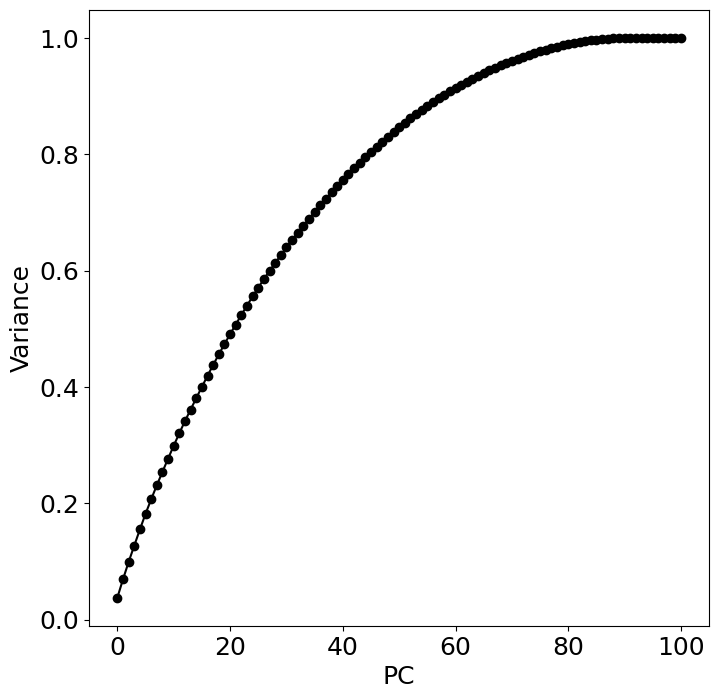

In [97]:
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams.update({'font.size':18})
plt.plot(np.cumsum(S1)/np.sum(S1), '-o', color='k')
plt.xlabel('PC')
plt.ylabel('Variance')
plt.show()

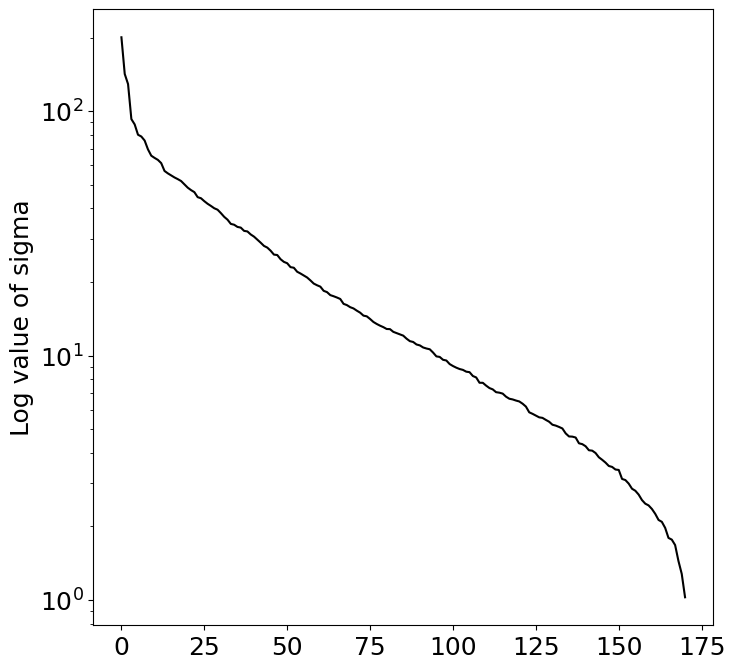

In [98]:
plt.semilogy(S, color='k')
plt.ylabel('Log value of sigma')
plt.show()

In [99]:
indx = np.where(np.cumsum(S1)/np.sum(S1)>= 0.9)[0][0]
print(f'90% of the variance is explained by {indx} Principle Components')

90% of the variance is explained by 58 Principle Components


In [100]:
pc = 58
X_app = U1[:, :pc] @ np.diag(S1[:pc]) @ VT1[:pc,:]
V_pc = VT1[:pc, :]

feature_imp = np.abs(V_pc).sum(axis=0)
sorted_ind = np.argsort(feature_imp)[::-1]

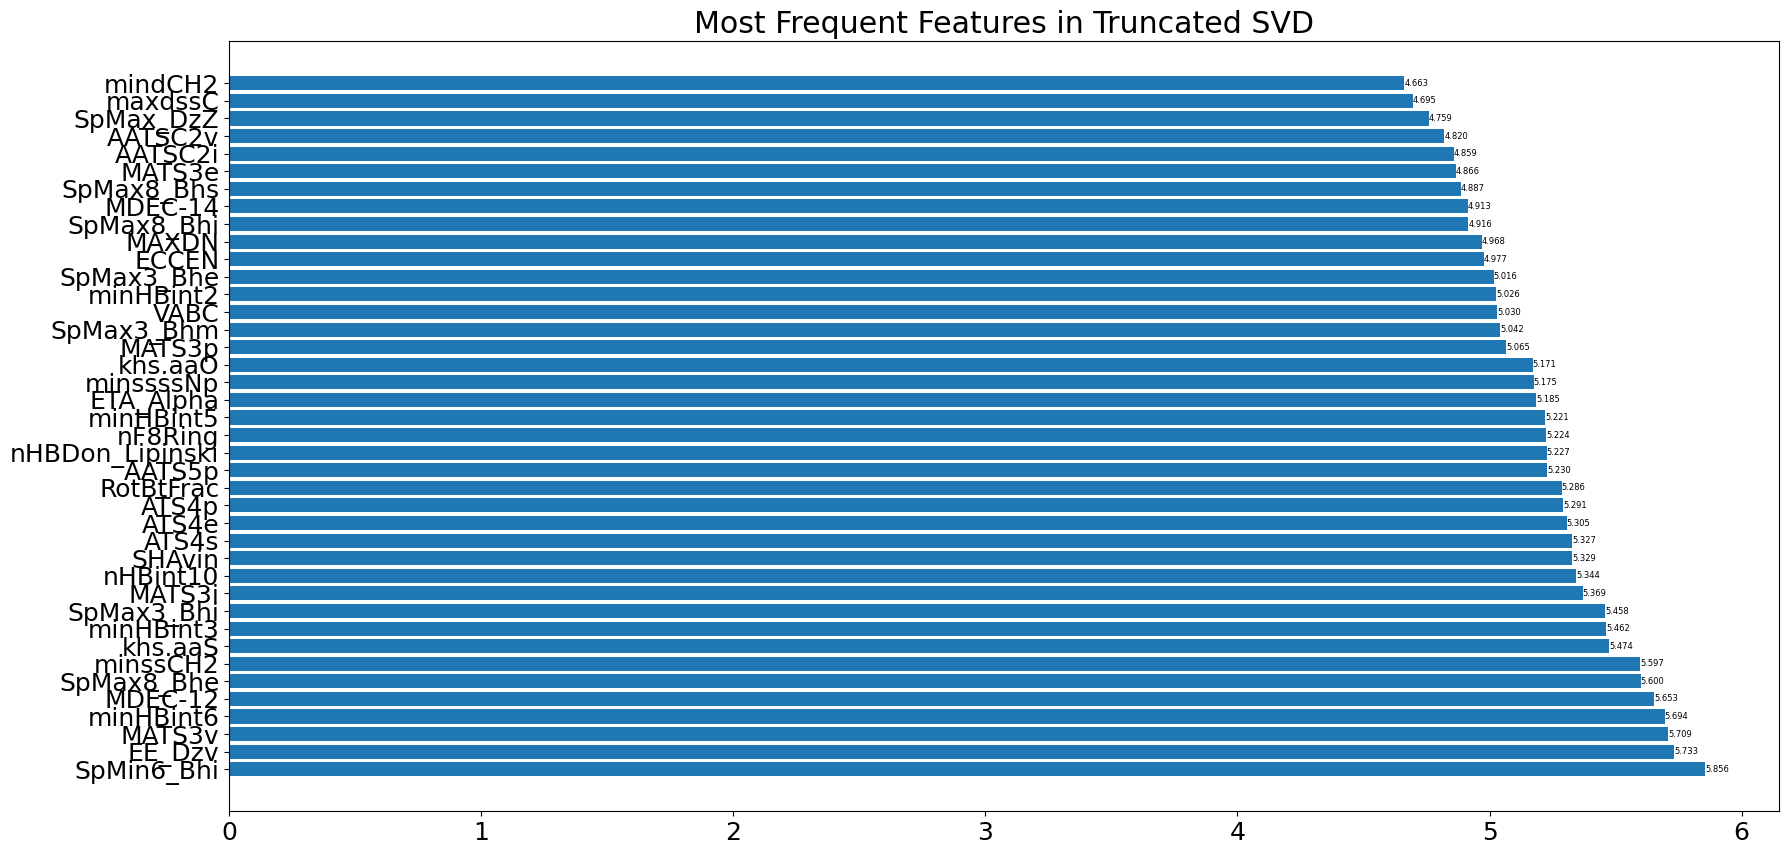

In [101]:
features = [fl.columns[i] for i in sorted_ind[:40]]

plt.figure(figsize=(20, 10))
bars = plt.barh(range(40), feature_imp[sorted_ind[:40]])
for bar, value in zip(bars, feature_imp[sorted_ind[:40]]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.3f}',
             va='center', ha='left', fontsize=6)

plt.yticks(range(40), features)
plt.title('Most Frequent Features in Truncated SVD')
plt.show()

In [102]:
col = [selected_feature_fl.columns[i] for i in sorted_ind[:40]] + ['Class']

In [103]:
selected_feature_fl1 = selected_feature_fl[col]
selected_feature_fl1

,MDEO-22,GATS7p,nF6Ring,WTPT-2,LipinskiFailures,BCUTw-1l,ALogp2,nAcid,MDEN-12,minHBa,...,minHBint5,minHBint4,MDEC-44,minHBint6,MDEC-14,nAtomLC,C3SP3,ATSC8i,GATS8c,Class
0,-0.255827,-1.078383,-0.097186,0.070844,-0.363937,-0.805755,-0.363072,-0.182956,-0.196619,-0.104610,...,-0.381524,2.488984,-0.106651,0.002159,-0.165773,-1.324645,-0.436616,-2.433366,0.226903,0
1,-0.255827,-0.948786,-0.097186,0.230632,-0.363937,-0.062142,-0.095924,-0.182956,-0.196619,0.545004,...,-0.381524,-0.431683,-0.106651,0.518545,-0.165773,0.589560,-0.436616,-0.083175,0.482808,0
2,-0.255827,-0.696504,-0.097186,-0.000722,-0.363937,-0.805755,0.762469,-0.182956,-0.196619,0.081088,...,-0.381524,-0.431683,-0.106651,-0.414969,-0.165773,-0.048508,-0.436616,-0.989060,-0.347713,0
3,-0.255827,-0.301665,-0.097186,0.056037,-0.363937,1.402777,-0.189184,-0.182956,-0.196619,-0.399941,...,-0.139168,-0.175598,-0.106651,-0.184560,-0.165773,1.227629,-0.436616,0.507574,0.221051,0
4,-0.255827,-2.113430,-0.097186,-0.006891,-0.363937,1.386418,-0.051706,-0.182956,-0.196619,-0.118242,...,5.144201,-0.431683,-0.106651,-0.414969,-0.165773,-0.686577,-0.436616,1.205041,0.580723,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.255827,-0.984209,-0.097186,0.019021,-0.363937,-0.805755,-0.681911,-0.182956,-0.196619,-1.395691,...,-0.381524,-0.431683,-0.106651,-0.414969,-0.165773,0.589560,-0.436616,-0.314176,0.490610,0
167,-0.255827,-0.142693,-0.097186,0.442861,2.747726,-0.805755,-0.996238,-0.182956,-0.196619,0.283447,...,-0.381524,-0.431683,-0.106651,-0.414969,-0.165773,-1.324645,-0.436616,-0.645572,-1.161849,0
168,1.817244,-0.577275,-0.097186,0.210890,-0.363937,-0.805755,-0.744470,-0.182956,-0.196619,-0.023838,...,-0.381524,-0.431683,-0.106651,0.045211,-0.165773,-0.048508,1.027331,0.427314,-0.564218,0
169,-0.255827,-1.077519,-0.097186,0.033827,-0.363937,-0.805755,-0.408819,-0.182956,-0.196619,-0.066496,...,-0.381524,-0.431683,-0.106651,-0.414969,-0.165773,-0.686577,-0.436616,2.708521,0.750806,1


In [104]:
X = selected_feature_fl1.drop(columns='Class')
y = selected_feature_fl1['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'accuracy:{acc}')
print(class_report)

accuracy:0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       0.75      1.00      0.86         6

    accuracy                           0.89        18
   macro avg       0.88      0.92      0.88        18
weighted avg       0.92      0.89      0.89        18



# Third Iteration

In [105]:
U2, S2, VT2 = np.linalg.svd(selected_feature_fl1, full_matrices=0)

Total points plotted: 171


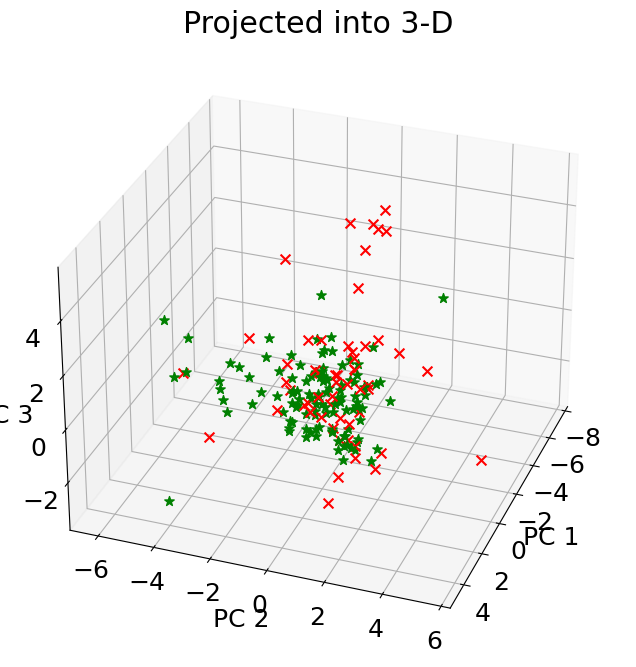

In [106]:
fig2 = plt.figure(figsize=(10, 8))
ax = fig2.add_subplot(111, projection='3d')

count = 0
x_values = []
y_values = []
z_values = []

for i, row in selected_feature_fl1.iterrows():
    x = VT2[0, :] @ row.values.T
    y = VT2[1, :] @ row.values.T
    z = VT2[2, :] @ row.values.T

    x_values.append(x)
    y_values.append(y)
    z_values.append(z)

    if row['Class'] == 1:
        ax.scatter(x, y, z, marker='x', color='r', s=50)
    else:
        ax.scatter(x, y, z, marker='*', color='g', s=50)

    count += 1

ax.view_init(30, 20)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')


print(f"Total points plotted: {count}")
plt.title("Projected into 3-D")

plt.show()

In [107]:
dig_matrix = np.diag(S2)
dig_matrix.shape

(41, 41)

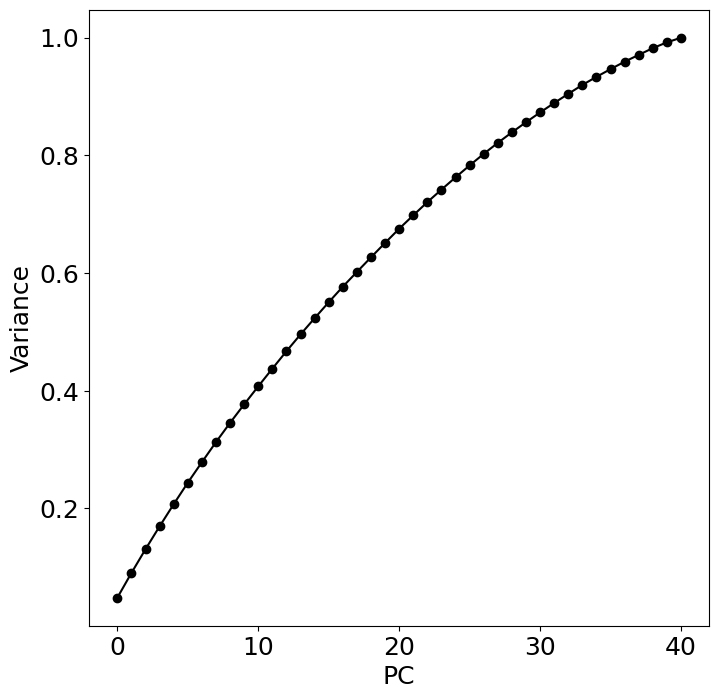

In [108]:
plt.rcParams['figure.figsize']=[8,8]
plt.rcParams.update({'font.size':18})
plt.plot(np.cumsum(S2)/np.sum(S2), '-o', color='k')
plt.xlabel('PC')
plt.ylabel('Variance')
plt.show()

In [109]:
indx = np.where(np.cumsum(S2)/np.sum(S2)>= 0.90)[0][0]
print(f'90% of the variance is explained by {indx} Principle Components')

90% of the variance is explained by 32 Principle Components


In [110]:
pc = 32
X_app = U2[:, :pc] @ np.diag(S2[:pc]) @ VT2[:pc,:]
V_pc = VT2[:pc, :]

feature_imp = np.abs(V_pc).sum(axis=0)
sorted_ind = np.argsort(feature_imp)[::-1]

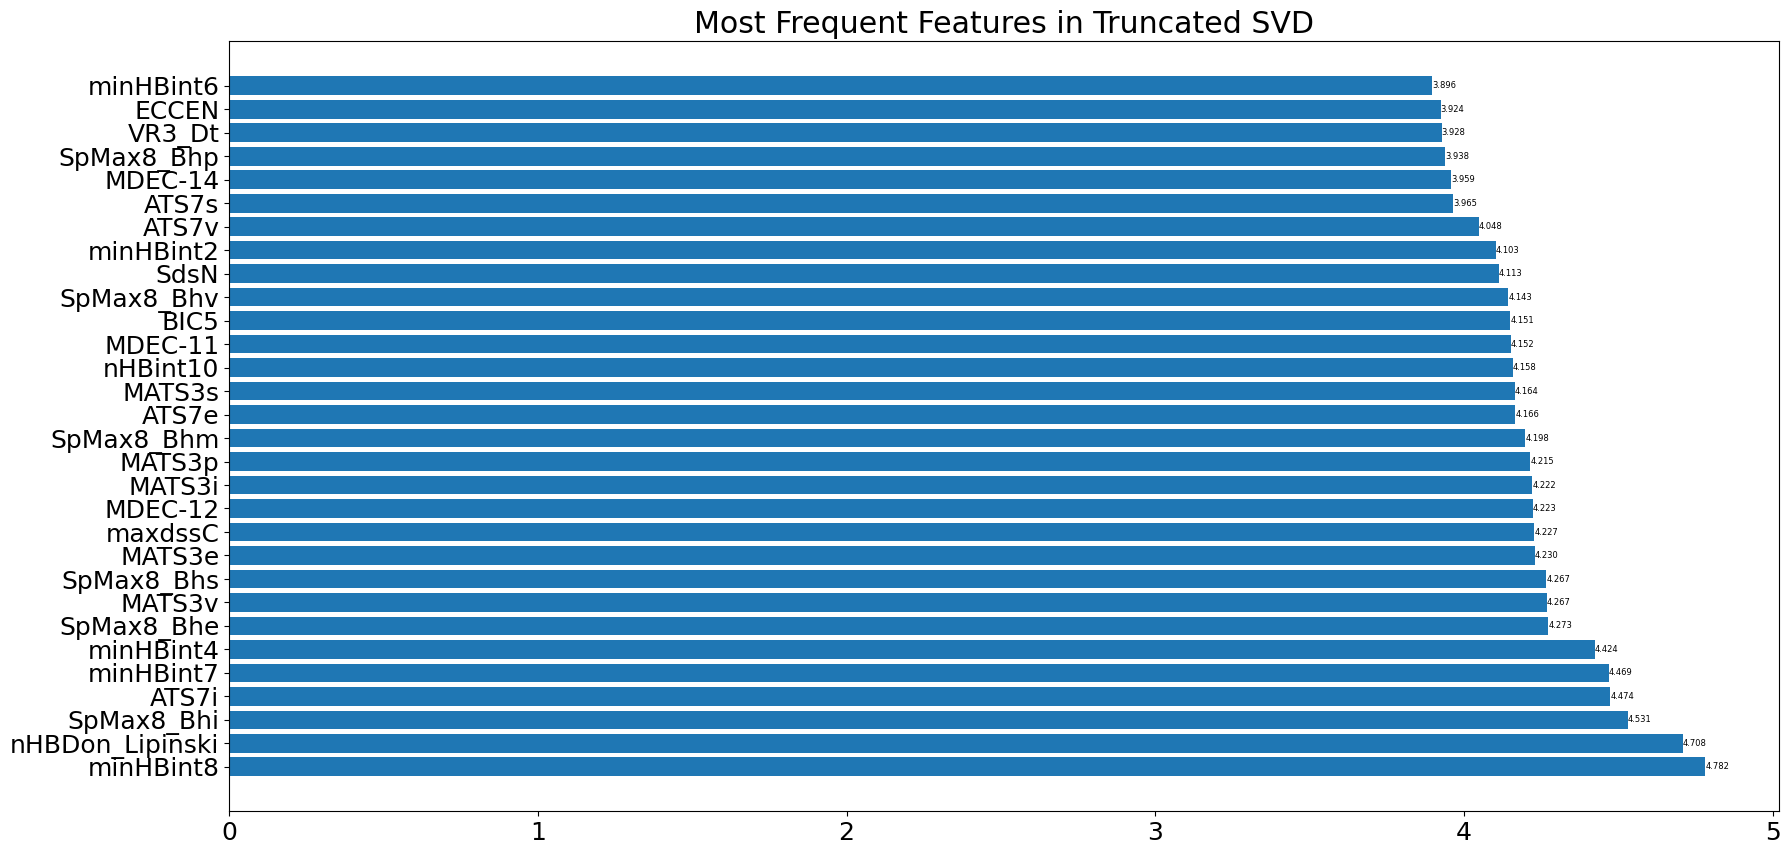

In [111]:
features = [fl.columns[i] for i in sorted_ind[:30]]

plt.figure(figsize=(20, 10))
bars = plt.barh(range(30), feature_imp[sorted_ind[:30]])
for bar, value in zip(bars, feature_imp[sorted_ind[:30]]):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.3f}',
             va='center', ha='left', fontsize=6)

plt.yticks(range(30), features)
plt.title('Most Frequent Features in Truncated SVD')
plt.show()

In [112]:
col = [selected_feature_fl1.columns[i] for i in sorted_ind[:15]] + ['Class'] #15

In [113]:
selected_feature_fl2 = selected_feature_fl1[col]
selected_feature_fl2

,BCUTw-1l,LipinskiFailures,minaaN,minHBint4,MDEC-22,MDEN-11,MolIP,MDEO-22,BCUTc-1l,ALogp2,GATS8c,minssCH2,FMF,WTPT-2,minaaaC,Class
0,-0.805755,-0.363937,0.989225,2.488984,0.231498,-0.111948,0.10261,-0.255827,0.474713,-0.363072,0.226903,-0.752676,0.114072,0.070844,0.982097,0
1,-0.062142,-0.363937,-1.070465,-0.431683,0.824573,-0.111948,0.10261,-0.255827,0.815158,-0.095924,0.482808,2.238976,0.319326,0.230632,1.171819,0
2,-0.805755,-0.363937,-1.070465,-0.431683,-1.737138,-0.111948,0.10261,-0.255827,0.091378,0.762469,-0.347713,0.873758,-0.094814,-0.000722,-1.271880,0
3,1.402777,-0.363937,-1.070465,-0.175598,0.734816,-0.111948,0.10261,-0.255827,0.745460,-0.189184,0.221051,0.172204,0.263926,0.056037,0.808415,0
4,1.386418,-0.363937,0.752449,-0.431683,-0.109687,-0.111948,0.10261,-0.255827,0.815158,-0.051706,0.580723,0.949540,-0.140225,-0.006891,-1.271880,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.805755,-0.363937,-1.070465,-0.431683,0.557875,-0.111948,0.10261,-0.255827,-0.431352,-0.681911,0.490610,0.477340,0.098633,0.019021,1.435092,0
167,-0.805755,2.747726,1.210790,-0.431683,1.562315,-0.111948,0.10261,-0.255827,2.447683,-0.996238,-1.161849,2.060717,0.281182,0.442861,1.561803,0
168,-0.805755,-0.363937,-1.070465,-0.431683,1.581914,-0.111948,0.10261,1.817244,-0.270512,-0.744470,-0.564218,-0.356545,0.161299,0.210890,1.287989,0
169,-0.805755,-0.363937,0.820042,-0.431683,0.203015,-0.111948,0.10261,-0.255827,0.815158,-0.408819,0.750806,0.801995,0.098633,0.033827,-1.271880,1


In [114]:
X = selected_feature_fl2.drop(columns='Class')
y = selected_feature_fl2['Class']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'accuracy:{acc}')
print(class_report)

accuracy:0.8333333333333334
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        12
           1       1.00      0.50      0.67         6

    accuracy                           0.83        18
   macro avg       0.90      0.75      0.78        18
weighted avg       0.87      0.83      0.81        18

